# VaR using Monte Carlo simulation (Gemoetric Brownian Motion)

In [26]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import pandas as pd
import yfinance as yf


In [53]:


#define the ticker symbol
tickerSymbols = ['AAPL','MSFT','TSM','NVDA','CSCO','ACN','ADBE','IBM']


def getprice(tickerSymbol):
    tickerData = yf.Ticker(tickerSymbol)
    tickerDf = tickerData.history(period='1y')
    return tickerDf['Close'][0]

#see your data
PortfolioValue=0
for i in tickerSymbols:
    PortfolioValue+=getprice(i)
    
PortfolioValue=PortfolioValue*100  #100 units of each stock

PortfolioValue

183234.58862304688

In [126]:
def getPFseries(tickerSymbol):
    tickerData = yf.Ticker(tickerSymbol)
    tickerDf = tickerData.history(period='20y')
    return tickerDf['Close']
vol_cal=np.zeros(5036)
for i in tickerSymbols:
    vol_cal+=getPFseries(i)

vol_cal

Date
2002-10-08 00:00:00-04:00      74.983931
2002-10-09 00:00:00-04:00      72.666496
2002-10-10 00:00:00-04:00      77.161422
2002-10-11 00:00:00-04:00      83.646877
2002-10-14 00:00:00-04:00      83.698203
                                ...     
2022-10-03 00:00:00-04:00    1290.110012
2022-10-04 00:00:00-04:00    1336.060005
2022-10-05 00:00:00-04:00    1341.619991
2022-10-06 00:00:00-04:00    1329.499996
2022-10-07 00:00:00-04:00    1272.409985
Name: Close, Length: 5036, dtype: float64

In [127]:
vol_cal=np.log(vol_cal/vol_cal.shift())
vol_cal

Date
2002-10-08 00:00:00-04:00         NaN
2002-10-09 00:00:00-04:00   -0.031393
2002-10-10 00:00:00-04:00    0.060019
2002-10-11 00:00:00-04:00    0.080704
2002-10-14 00:00:00-04:00    0.000613
                               ...   
2022-10-03 00:00:00-04:00    0.029992
2022-10-04 00:00:00-04:00    0.034997
2022-10-05 00:00:00-04:00    0.004153
2022-10-06 00:00:00-04:00   -0.009075
2022-10-07 00:00:00-04:00   -0.043890
Name: Close, Length: 5036, dtype: float64

In [134]:
vol = vol_cal.std()
vol

0.01435834550230413

In [135]:
n_sims = 1000000
rfr = 0.07
time=30
#vol = 0.25
S0 = PortfolioValue

In [136]:
d = (rfr - 0.5*vol**2)*(time/252)
a=vol*np.sqrt(time/252)
r=np.random.normal(0,1,(n_sims,1))

GBM_returns = S0 * np.exp(d+a*r)

In [137]:
GBM_returns

array([[183875.09769036],
       [184506.75458664],
       [184987.83312417],
       ...,
       [184889.99232592],
       [185418.72676105],
       [184955.95992636]])

In [138]:
pers = [0.01,0.1,1,2.5,5,10]

var=scs.scoreatpercentile(GBM_returns-S0 ,pers)
var 

array([-1861.03779228, -1283.72580841,  -585.88557207,  -253.2531626 ,
          34.69684584,   364.07607889])

In [139]:
df=pd.DataFrame(var,pers,columns=['VaR'])
df

,VaR
0.01,-1861.037792
0.10,-1283.725808
1.00,-585.885572
2.50,-253.253163
5.00,34.696846
10.00,364.076079


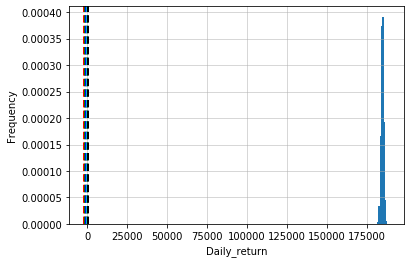

In [141]:
plt.hist(GBM_returns, density=True, bins=10)

plt.axvline(df.loc[0.01]['VaR']+1, color ='r',linestyle='dashed',linewidth = 2)

plt.axvline(df.loc[0.1]['VaR']+1, color ='g',linestyle='dashed',linewidth = 2)
plt.axvline(df.loc[1]['VaR']+1, color ='b',linestyle='dashed',linewidth = 2)
plt.axvline(df.loc[2.5]['VaR']+1, color ='y',linestyle='dashed',linewidth = 2)
plt.axvline(df.loc[5]['VaR']+1, color ='c',linestyle='dashed',linewidth = 2)
plt.axvline(df.loc[10]['VaR']+1, color ='k',linestyle='dashed',linewidth = 2)



plt.ylabel('Frequency')
plt.xlabel('Daily_return')
plt.grid(True, linewidth=0.5)

plt.show()